In [15]:
import pandas as pd # type: ignore

# Read the CSV file
data = pd.read_csv('train.csv')

# Display the first few rows of the data
data.head()

,Id,'Gas_Connection','Fireplace','Entrance_Hall','Kitchenette','Equipped',Garage_Type,'Furnished','Drainage','Telephone',...,'Dining_Room','Office',Total_Area_m2,'Heating',District,'Daycare',Property_Condition,'Internet_Room','Service_Bathroom',Price
0,0,1,Not specified,0,0,Not specified,Paralelas,Not specified,Not specified,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210000
1,1,0,1,Not specified,0,0,Paralelas,0,0,0,...,1,0,311,0,LaMolina,Not specified,Bueno,Not specified,1,660000
2,2,Not specified,Not specified,1,0,Not specified,Lineales,Not specified,Not specified,Not specified,...,1,1,1400,Not specified,LaMolina,0,Bueno,0,1,1500000
3,3,0,1,Not specified,0,0,Separadas,0,0,0,...,1,0,317,0,SanIsidro,Not specified,Remodelado,Not specified,1,1100000
4,4,0,Not specified,Not specified,0,Not specified,Lineales,Not specified,Not specified,0,...,0,0,246,Not specified,VillaMariaDelTriunfo,Not specified,Regular,Not specified,0,110000


In [16]:
data

,Id,'Gas_Connection','Fireplace','Entrance_Hall','Kitchenette','Equipped',Garage_Type,'Furnished','Drainage','Telephone',...,'Dining_Room','Office',Total_Area_m2,'Heating',District,'Daycare',Property_Condition,'Internet_Room','Service_Bathroom',Price
0,0,1,Not specified,0,0,Not specified,Paralelas,Not specified,Not specified,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210000
1,1,0,1,Not specified,0,0,Paralelas,0,0,0,...,1,0,311,0,LaMolina,Not specified,Bueno,Not specified,1,660000
2,2,Not specified,Not specified,1,0,Not specified,Lineales,Not specified,Not specified,Not specified,...,1,1,1400,Not specified,LaMolina,0,Bueno,0,1,1500000
3,3,0,1,Not specified,0,0,Separadas,0,0,0,...,1,0,317,0,SanIsidro,Not specified,Remodelado,Not specified,1,1100000
4,4,0,Not specified,Not specified,0,Not specified,Lineales,Not specified,Not specified,0,...,0,0,246,Not specified,VillaMariaDelTriunfo,Not specified,Regular,Not specified,0,110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6995,Not specified,Not specified,Not specified,0,Not specified,Not specified,Not specified,Not specified,Not specified,...,1,0,193,Not specified,LaVictoria,Not specified,Bueno,Not specified,0,450000
6996,6996,0,0,1,0,0,Not specified,1,0,0,...,1,0,144,0,Asia,0,Not specified,0,1,450000
6997,6997,0,0,Not specified,0,0,Not specified,0,1,1,...,1,0,396,0,SantiagoDeSurco,Not specified,Not specified,Not specified,1,450000
6998,6998,Not specified,Not specified,1,0,Not specified,Not specified,Not specified,Not specified,Not specified,...,1,0,188,Not specified,Bellavista,0,Muy bueno,0,1,240000


In [17]:
data.columns = data.columns.str.replace("'", "", regex=False)

In [18]:
for column in data.columns:
    print('--------------------------------')
    print(data.groupby(column).size())

--------------------------------
Id
0       1
1       1
2       1
3       1
4       1
       ..
6995    1
6996    1
6997    1
6998    1
6999    1
Length: 7000, dtype: int64
--------------------------------
Gas_Connection
0                3175
1                 484
Not specified    3341
dtype: int64
--------------------------------
Fireplace
0                3270
1                1319
Not specified    2411
dtype: int64
--------------------------------
Entrance_Hall
0                1864
1                2695
Not specified    2441
dtype: int64
--------------------------------
Kitchenette
0                6791
Not specified     209
dtype: int64
--------------------------------
Equipped
0                4161
1                 428
Not specified    2411
dtype: int64
--------------------------------
Garage_Type
Lineales          604
NoTiene           835
Not specified    2892
Paralelas        2505
Separadas         164
dtype: int64
--------------------------------
Furnished
0                3

In [19]:
# Remove Construction_Area column, its redundant with construction area
data.drop(columns=['Construction_Area'], inplace=True)

In [20]:
print(data.groupby('Independent_Entrance').size())
#Remove Asia value
data = data[(data['Independent_Entrance'] == '0') | (data['Independent_Entrance'] == '1') | (data['Independent_Entrance'] == 'Nulo') | (data['Independent_Entrance'] == 'Not specified')]
print(data.groupby('Independent_Entrance').size())

Independent_Entrance
0                2624
1                   3
Las Arenas          3
Not specified    3873
dtype: int64
Independent_Entrance
0                2624
1                   3
Not specified    3873
dtype: int64


In [21]:
print(data.groupby('Jacuzzi').size())
#Remove Asia value
data = data[(data['Jacuzzi'] == '0') | (data['Jacuzzi'] == '1') | (data['Jacuzzi'] == 'Nulo') | (data['Jacuzzi'] == 'Not specified')]
print(data.groupby('Jacuzzi').size())

Jacuzzi
0                3330
1                 854
Not specified    2316
dtype: int64
Jacuzzi
0                3330
1                 854
Not specified    2316
dtype: int64


In [22]:
print(data.groupby('Service_Bathroom').size())
#Remove Asia value
data = data[data['Service_Bathroom'] != 'Asia']

Service_Bathroom
0                1400
1                4880
Not specified     220
dtype: int64


In [23]:
print(data.groupby('Cable').size())
#Remove Asia value
data = data[(data['Cable'] == '0') | (data['Cable'] == '1') | (data['Cable'] == 'Nulo') | (data['Cable'] == 'Not specified')]
print(data.groupby('Cable').size())

Cable
0                1997
1                1302
Cerro Azul          1
Curayacu            1
La Encontrada       1
Mejia               1
Not specified    3160
Nulo               37
dtype: int64
Cable
0                1997
1                1302
Not specified    3160
Nulo               37
dtype: int64


In [24]:
def replace_not_specified_with_false(column):
    data[column].fillna(False, inplace=True)
    data[column] = data[column].apply(lambda x: False if (x == 'Not specified' or x == 'Nulo') else 
                                      True if (x == '1' or x == 'Si') 
                                      else False if (x == '0' or x == 'No') else x)
    data.groupby(column).size()


In [25]:
# Posibles columnas repetidas en el dataset
# Sauna, Sauna_area,
# Oceanfront, Near_Sea
# Kitchenette, Kitchen_with_Cabinets


columns = ['Gas_Connection', 'Fireplace', 'Entrance_Hall', 'Kitchenette',
           'Equipped', 'Furnished', 'Drainage', 'Telephone', 'Guest_Bathroom', 'BBQ_Area',
           'Living_Room', 'Nearby_Parks', 'Solarium', 'Commercial_Use', 'Internal_Garden', 
           'Electricity', 'Patio', 'Children_Playground', 'Green_Areas', 'Electric_Doorman',
           'Intercom', 'Near_Sea', 'Sauna', 'Cinema_Room', 'Cleaning_Service', 'Terrace',
           'Sports_Area', 'Security_System', 'Water_Heater', 'Professional_Use', 'Club_House',
           'Internal_Park', 'Laundry_Room', 'Nearby_Schools', 'Balcony', 'Attic', 'Oceanfront', 'Security_Guard',
           'Swimming_Pool', 'Electric_Fence', 'Air_Conditioning', 'Hall', 'Nearby_Shopping_Centers', 'Kitchen',
           'Water', 'Basement', 'Independent_Bathroom', 'Walk_in_Closet', 'Daily_Dining_Room', 'Grill', 'Closet',
           'Internet', 'Sauna_Area', 'Kitchen_with_Cabinets', 'Gym', 'Handicap_Access', 'Dining_Room',
           'Office', 'Service_Bathroom', 'Storage_Room', 'Cable', 'Jacuzzi', 'Independent_Entrance']
for column in columns:
    print(f'Processing column: {column}')
    replace_not_specified_with_false(column)

Processing column: Gas_Connection
Processing column: Fireplace
Processing column: Entrance_Hall
Processing column: Kitchenette
Processing column: Equipped
Processing column: Furnished
Processing column: Drainage
Processing column: Telephone
Processing column: Guest_Bathroom
Processing column: BBQ_Area
Processing column: Living_Room
Processing column: Nearby_Parks
Processing column: Solarium
Processing column: Commercial_Use
Processing column: Internal_Garden
Processing column: Electricity
Processing column: Patio
Processing column: Children_Playground
Processing column: Green_Areas
Processing column: Electric_Doorman
Processing column: Intercom
Processing column: Near_Sea
Processing column: Sauna
Processing column: Cinema_Room
Processing column: Cleaning_Service
Processing column: Terrace
Processing column: Sports_Area
Processing column: Security_System
Processing column: Water_Heater


Processing column: Professional_Use
Processing column: Club_House
Processing column: Internal_Park
Processing column: Laundry_Room
Processing column: Nearby_Schools
Processing column: Balcony
Processing column: Attic
Processing column: Oceanfront
Processing column: Security_Guard
Processing column: Swimming_Pool
Processing column: Electric_Fence


/tmp/ipykernel_8536/624220608.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(False, inplace=True)
/tmp/ipykernel_8536/624220608.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

Processing column: Air_Conditioning
Processing column: Hall
Processing column: Nearby_Shopping_Centers
Processing column: Kitchen
Processing column: Water
Processing column: Basement
Processing column: Independent_Bathroom
Processing column: Walk_in_Closet
Processing column: Daily_Dining_Room
Processing column: Grill
Processing column: Closet
Processing column: Internet
Processing column: Sauna_Area
Processing column: Kitchen_with_Cabinets
Processing column: Gym
Processing column: Handicap_Access
Processing column: Dining_Room
Processing column: Office
Processing column: Service_Bathroom
Processing column: Storage_Room
Processing column: Cable
Processing column: Jacuzzi
Processing column: Independent_Entrance


/tmp/ipykernel_8536/624220608.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(False, inplace=True)
/tmp/ipykernel_8536/624220608.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [26]:
# Drop unique columns
for column in data.columns:
    if len(data[column].unique()) == len(data):
        print(f'Dropping unique column: {column}')
        data.drop(columns=[column], inplace=True)
    elif len(data[column].unique()) == 1:
        print(f'Dropping column with one value: {column}')
        data.drop(columns=[column], inplace=True)

Dropping unique column: Id
Dropping column with one value: Kitchenette
Dropping column with one value: Match


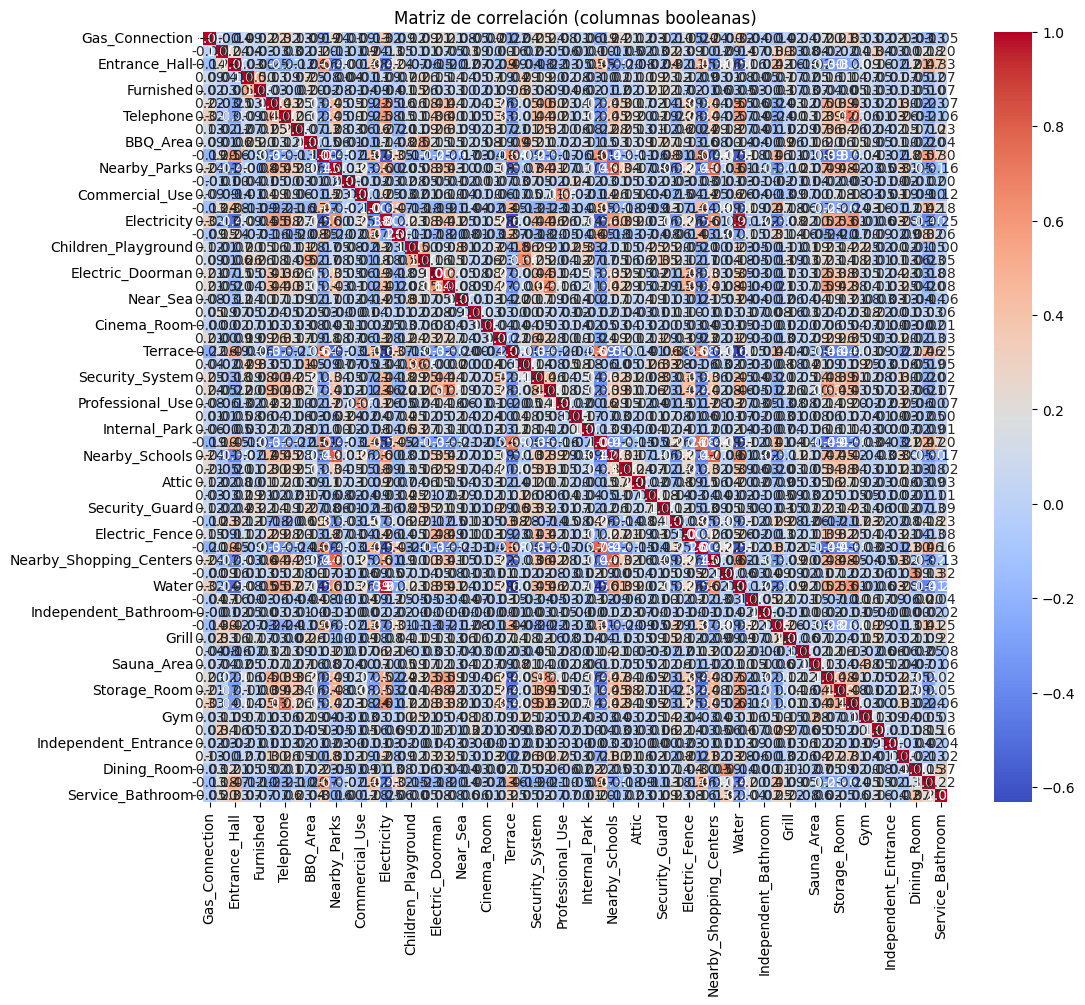

In [27]:
# Matriz de correlación solo para columnas booleanas
bool_cols = data.select_dtypes(include=['bool']).columns
corr_matrix_bool = data[bool_cols].corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_bool, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación (columnas booleanas)')
plt.show()